# Step 1: Setup imports and data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
df_articles = pd.read_csv("shared_articles.csv")
df_inter = pd.read_csv("users_interactions.csv")



# df_articles
df_inter

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
72307,1485190425,LIKE,-6590819806697898649,-9016528795238256703,8614469745607949425,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR
72308,1485190425,VIEW,-5813211845057621660,102305705598210278,5527770709392883642,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR
72309,1485190072,VIEW,-1999468346928419252,-9196668942822132778,-8300596454915870873,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,SP,BR
72310,1485190434,VIEW,-6590819806697898649,-9016528795238256703,8614469745607949425,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR


In [2]:
#personId = user
#contentId = item
#eventType = rating (ordinal)

In [3]:

for item in df_inter["eventType"].unique(): # For testing
    print(item)



VIEW
FOLLOW
BOOKMARK
LIKE
COMMENT CREATED


In [4]:
# Change the eventType to be ordinal
# VIEW = 1
# FOLLOW = 2
# BOOKMARK = 3 
# LIKE = 4
# COMMENT CREATED = 5

event_type_mapping = {
    'VIEW': 1,
    'LIKE': 2,
    'FOLLOW': 3,
    'BOOKMARK': 4,
    'COMMENT CREATED': 5
}

df_inter['eventType'] = df_inter['eventType'].map(event_type_mapping)

df_inter

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,1,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,1,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,1,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,3,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,1,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
72307,1485190425,2,-6590819806697898649,-9016528795238256703,8614469745607949425,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR
72308,1485190425,1,-5813211845057621660,102305705598210278,5527770709392883642,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR
72309,1485190072,1,-1999468346928419252,-9196668942822132778,-8300596454915870873,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,SP,BR
72310,1485190434,1,-6590819806697898649,-9016528795238256703,8614469745607949425,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR


<Axes: xlabel='eventType', ylabel='Count'>

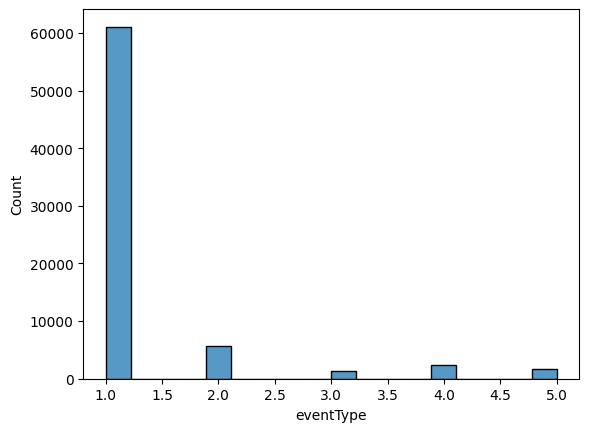

In [5]:
sns.histplot(data=df_inter, x="eventType")

In [6]:
print("Number of ratings: {}".format(df_inter.shape[0]))
print("Number of articles: {}".format(df_inter.contentId.nunique()))
print("Number of consumers: {}".format(df_inter.personId.nunique()))
print("Number of POssible Ratings: {}".format(df_inter.contentId.nunique() * df_inter.personId.nunique()))
print("Sparseness: {}".format(1 - (df_inter.shape[0] / (df_inter.contentId.nunique() * df_inter.personId.nunique() ))))


Number of ratings: 72312
Number of articles: 2987
Number of consumers: 1895
Number of POssible Ratings: 5660365
Sparseness: 0.9872248521075938


In [7]:
df_articles.contentId.value_counts()

contentId
-2990485643677949494    3
 756136904399885845     2
 7420742904084384944    2
 8219310215587599928    2
-6878119266243511199    2
                       ..
-6727393385193911938    1
 7351002593233940239    1
 1083474613819325601    1
-4994468824009200256    1
-6451309518266745024    1
Name: count, Length: 3057, dtype: int64

In [8]:
# Min: 1: The least number of interactions any single piece of content has received is 1.
# Quartile 1 (Q1): 6.0: 25% of the content has 6 or fewer interactions.
# Median: 14.0: 50% of the content has 14 or fewer interactions. This is the middle value.
# Quartile 3 (Q3): 30.0: 75% of the content has 30 or fewer interactions.
# Max: 433: The most number of interactions any single piece of content has received is 433.
# For personId:
# Min: 1: The least number of interactions any single person has made is 1.
# Quartile 1 (Q1): 3.0: 25% of the people have made 3 or fewer interactions.
# Median: 10.0: 50% of the people have made 10 or fewer interactions. This is the middle value.
# Quartile 3 (Q3): 32.0: 75% of the people have made 32 or fewer interactions.
# Max: 1885: The most number of interactions any single person has made is 1885.

# number of interactions any single piece of content has received (i.e. likes, views, follows, bookmark, comment)
print('Min:\t\t', df_inter['contentId'].value_counts().min()) 
print('Quartile 1:\t', df_inter['contentId'].value_counts().quantile(.25))
print('Median:\t\t', df_inter['contentId'].value_counts().quantile(.5))
print('Quartile 3:\t', df_inter['contentId'].value_counts().quantile(.75))
print('Max:\t\t', df_inter['contentId'].value_counts().max())
print()

# number of interactions any single person has made (i.e. who's on social media a lot)
print('Min:\t\t', df_inter['personId'].value_counts().min())
print('Quartile 1:\t', df_inter['personId'].value_counts().quantile(.25))
print('Median:\t\t', df_inter['personId'].value_counts().quantile(.5))
print('Quartile 3:\t', df_inter['personId'].value_counts().quantile(.75))
print('Max:\t\t', df_inter['personId'].value_counts().max())

Min:		 1
Quartile 1:	 6.0
Median:		 14.0
Quartile 3:	 30.0
Max:		 433

Min:		 1
Quartile 1:	 3.0
Median:		 10.0
Quartile 3:	 32.0
Max:		 1885


In [9]:
value_counts = df_inter['contentId'].value_counts()
keep_list = value_counts[value_counts >= 32]
#display(keep_list)
df_inter = df_inter.loc[df_inter['contentId'].isin(keep_list.index)]
print("Number of articles kept: {}".format(keep_list.shape[0]))
print("Total articles: {}".format(df_inter.shape[0]))

print('Min:\t\t', df_inter['contentId'].value_counts().min())
print('Quartile 1:\t', df_inter['contentId'].value_counts().quantile(.25))
print('Median:\t\t', df_inter['contentId'].value_counts().quantile(.5))
print('Quartile 3:\t', df_inter['contentId'].value_counts().quantile(.75))
print('Max:\t\t', df_inter['contentId'].value_counts().max())

Number of articles kept: 703
Total articles: 45917
Min:		 32
Quartile 1:	 38.0
Median:		 49.0
Quartile 3:	 73.0
Max:		 433


In [10]:
df_inter
# df_articles

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
1,1465412560,1,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,1,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,3,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
5,1465413742,1,310515487419366995,-8763398617720485024,1395789369402380392,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,MG,BR
7,1465415066,1,-1492913151930215984,4254153380739593270,8743229464706506141,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR
...,...,...,...,...,...,...,...,...
72306,1485190133,1,5484061377044071389,3609194402293569455,-344378995821744418,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,SP,BR
72307,1485190425,2,-6590819806697898649,-9016528795238256703,8614469745607949425,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR
72308,1485190425,1,-5813211845057621660,102305705598210278,5527770709392883642,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR
72309,1485190072,1,-1999468346928419252,-9196668942822132778,-8300596454915870873,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,SP,BR


In [11]:
# Count the number of users and items
U = df_inter.personId.nunique()
I = df_inter.contentId.nunique()

# Match the actual user and item IDs with consequtive intergers from 0 to n
user_mapper = dict(zip(np.unique(df_inter.personId), list(range(U))))
item_mapper = dict(zip(np.unique(df_inter.contentId), list(range(I))))

# Reverse the mapping
user_inv_mapper = dict(zip(list(range(U)), np.unique(df_inter.personId)))
item_inv_mapper = dict(zip(list(range(I)), np.unique(df_inter.contentId)))

# Create lists of users/items for each rating
user_index = [user_mapper[i] for i in df_inter['personId']]
item_index = [item_mapper[i] for i in df_inter['contentId']]

X = csr_matrix((df_inter['eventType'], (item_index, user_index)), shape=(I, U))
print(U, I)
print(user_mapper)
print(user_inv_mapper)
print(user_index)
print(X)

1801 703
{np.int64(-9223121837663643404): 0, np.int64(-9212075797126931087): 1, np.int64(-9207251133131336884): 2, np.int64(-9199575329909162940): 3, np.int64(-9196668942822132778): 4, np.int64(-9188188261933657343): 5, np.int64(-9172914609055320039): 6, np.int64(-9156344805277471150): 7, np.int64(-9150583489352258206): 8, np.int64(-9120685872592674274): 9, np.int64(-9109785559521267180): 10, np.int64(-9099478998637725255): 11, np.int64(-9083704948999852989): 12, np.int64(-9063420486253202900): 13, np.int64(-9060214117327732109): 14, np.int64(-9048557723087354030): 15, np.int64(-9047547311469006438): 16, np.int64(-9016528795238256703): 17, np.int64(-9012030317377670760): 18, np.int64(-9009798162809551896): 19, np.int64(-9001583565812478106): 20, np.int64(-8994220765455693336): 21, np.int64(-8985529623369322698): 22, np.int64(-8984152171875293281): 23, np.int64(-8965597312806628567): 24, np.int64(-8965390025652957482): 25, np.int64(-8961797610770561652): 26, np.int64(-890966872565374311

In [12]:
def create_matrix(df, user, item, rating):
  import numpy as np
  from scipy.sparse import csr_matrix

  U = df[user].nunique()  # Number of users for the matrix
  I = df[item].nunique()  # Number of items for the matrix

  # Map user and movie IDs to matrix indices
  user_mapper = dict(zip(np.unique(df[user]), list(range(U))))
  item_mapper = dict(zip(np.unique(df[item]), list(range(I))))

  # Map matrix indices back to IDs
  user_inv_mapper = dict(zip(list(range(U)), np.unique(df[user])))
  item_inv_mapper = dict(zip(list(range(I)), np.unique(df[item])))

  # Create a list of index values for the csr_matrix for users and movies
  user_index = [user_mapper[i] for i in df[user]]
  item_index = [item_mapper[i] for i in df[item]]

  # Build the final matrix which will look like: (movieId, userId) rating
  X = csr_matrix((df[rating], (item_index, user_index)), shape=(I, U))

  return X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper

X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper = create_matrix(df_inter, 'personId', 'contentId', 'eventType')

In [13]:
def recommend(itemId, X, item_mapper, item_inv_mapper, k, metric='cosine', messages=True):
  from sklearn.neighbors import NearestNeighbors

  rec_ids = []                # Make a list for the recommended item IDs we'll get later
  item = item_mapper[itemId]  # Get the index of the movie ID passed into the function
  item_vector = X[item]       # Get the vector of user ratings for the movie ID passed into the function

  # Fit the clustering algorithm based on the user-item matrix X
  knn = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric).fit(X)

  # Call the trained knn cluster model to return the nearest neighbors of the item_vector passed in
  rec = knn.kneighbors(item_vector.reshape(1,-1), return_distance=True)
  rec_indeces = rec[1][0]     # Parse out the list of indeces of the recommended items
  rec_distances = rec[0][0]   # Parse out the recommendation strength calculated as the distance from the cluster center
  rec_distances = np.delete(rec_distances, 0) # Drop the first number in the list because it is the distance of itemId from itself

  # We need to replace the recommended item indeces with their original item IDs
  for i in range(1, knn.n_neighbors): # n_neighbors is the number of neighbors to return
    rec_ids.append(item_inv_mapper[rec_indeces[i]])

  # It may help to see what this is. The distance list is first and the recommended item indeces are second
  if messages:
    print(f'List of recommended item indeces:\n{rec_indeces}\n')
    print(f'List of recommended item IDs:\n{rec_ids}\n')
    print(f'List of recommended item similarity to selected item:\n{rec_distances}\n')

  # Return two lists: the original item IDs of the recommendations and their similarity scores
  return rec_ids, rec_distances

In [14]:
df_articles.set_index("contentId", inplace=True)

In [15]:
# Use any movie id here to get recommendations

'''for testing single id's'''
# contentId = 310515487419366995
# rec_ids, rec_distances = recommend(contentId, X, item_mapper, item_inv_mapper, k=5) #k= number of recommendations

# print(f"If you like {df_articles.loc[contentId, 'title']}, you may also enjoy:\n")
# print(f"\t{df_articles.loc[rec_ids, 'title']}")

'''for testing multiple id's'''
results = []

for content_id in df_inter["contentId"].unique():
    if content_id not in item_mapper:
        continue

    try:
        rec_ids, _ = recommend(content_id, X, item_mapper, item_inv_mapper, k=5)

        if rec_ids:
            # Get titles from rec_ids
            titles = [df_articles.loc[rid, "title"] if rid in df_articles.index else "Unknown" for rid in rec_ids]
            row = {"contentId": content_id}
            for i, title in enumerate(titles):
                row[f"recommendationTitle{i+1}"] = title
            results.append(row)
    except Exception as e:
        print(f"Skipping contentId {content_id} due to error: {e}")

# Convert to DataFrame and save
recommendations_df = pd.DataFrame(results)
recommendations_df.to_csv("collaborativeRecommendations.csv", index=False)

List of recommended item indeces:
[692 111 217 140 333  79]

List of recommended item IDs:
[np.int64(-6467708104873171151), np.int64(-3750879736572068916), np.int64(-5658245291907121574), np.int64(-401664538366009049), np.int64(-7126520323752764957)]

List of recommended item similarity to selected item:
[0.36216874 0.36960084 0.38697987 0.41427507 0.42189256]

List of recommended item indeces:
[362 486 631 409 237  71]

List of recommended item IDs:
[np.int64(3320201327008235211), np.int64(7395435905985567130), np.int64(1649085803937938638), np.int64(-3161714324304758767), np.int64(-7399665664688732365)]

List of recommended item similarity to selected item:
[0.50207805 0.51198438 0.52899431 0.55047947 0.55179594]

List of recommended item indeces:
[293 299 629 281 693 564]

List of recommended item IDs:
[np.int64(-1415040208471067980), np.int64(7270966256391553686), np.int64(-1730766821655383888), np.int64(8901449108040307914), np.int64(5424502143558028097)]

List of recommended item